Dataset: Titanic Dataset which contains details of the passengers on board RMS Titanic.

# Task1

Create a pandas dataframe from the given excel dataset.

In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.5)

In [97]:
df = pd.read_excel('archive/titanic3.xls')
print('rows: ', len(df))
df.head()

rows:  1309


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


# Task 2

Plot an analysis by sex indicating the ratio of men : women and how many survived
and died in this tragedy for both the genders.

In [98]:
dict1= dict()
for name, elements in df.groupby('sex'):
    dict1[name] = len(elements)
    
dict1

{'female': 466, 'male': 843}

In [99]:
labels = ['women' if i=='female' else 'men' for i in dict1.keys()]
labels

['women', 'men']

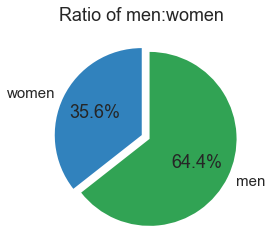

In [100]:
cmap = plt.get_cmap("tab20c")
colors = cmap(np.array([0, 8]))

fig, ax = plt.subplots()

ax.pie(dict1.values(), labels=labels, explode=(0, 0.1), autopct='%1.1f%%', startangle=90, colors=colors)
ax.set(aspect='equal', title='Ratio of men:women')
plt.show()

In [101]:
values = []
outer_labels = []
inner_labels = []
for name, group in df.groupby('sex'):
    outer_labels += [name]
    temp = []
    
    for name1, group1 in group.groupby('survived'):
        temp += [len(group1)]
        inner_labels += [name1]
    values += [temp]
    
print('values:', values, '\nouter_labels: ', outer_labels, '\ninner_labels: ', inner_labels)

values: [[127, 339], [682, 161]] 
outer_labels:  ['female', 'male'] 
inner_labels:  [0, 1, 0, 1]


In [102]:
values = np.asarray(values)

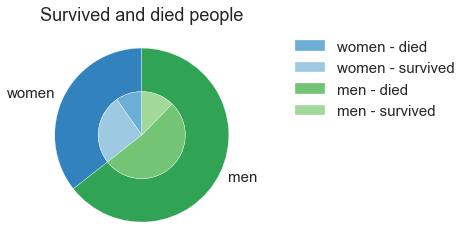

In [103]:
fig1, ax1 = plt.subplots()

cmap = plt.get_cmap("tab20c")
outer_colors = cmap(np.array([0, 8]))
inner_colors = cmap(np.array([1, 2, 9, 10]))

size=0.5
ax1.pie(values.sum(axis=1), radius=1, colors=outer_colors,
       wedgeprops=dict(width=size, edgecolor='w'), labels=['women' if l=='female' else 'men' for l in outer_labels], startangle=90)

patches, _ = ax1.pie(values.flatten(), radius=0.5, colors=inner_colors, 
        wedgeprops=dict(width=size, edgecolor='w'), startangle=90)

ax1.set(aspect="equal", title='Survived and died people')

plt.legend(patches, ['women - died', 'women - survived', 'men - died', 'men - survived'], 
           loc='upper right', bbox_to_anchor=(2, 1))
plt.show()

In [104]:
values = []
outer_labels = []
inner_labels = []
for name, elements in df.groupby('survived'):
    outer_labels += [name]
    grouped_by_sex = elements.groupby('sex')
    temp = []
    for name1, elements1 in grouped_by_sex:
        temp += [len(elements1)]
        inner_labels += [name1]
    values += [temp]
    
print('x:', values, '\nouter_labels: ', outer_labels, '\ninner_labels: ', inner_labels)

x: [[127, 682], [339, 161]] 
outer_labels:  [0, 1] 
inner_labels:  ['female', 'male', 'female', 'male']


In [105]:
values = np.asarray(values)

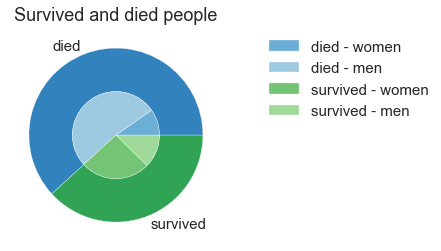

In [106]:
fig1, ax1 = plt.subplots()

cmap = plt.get_cmap("tab20c")
outer_colors = cmap(np.array([0, 8]))
inner_colors = cmap(np.array([1, 2, 9, 10]))

size=0.5
ax1.pie(values.sum(axis=1), radius=1, colors=outer_colors,
       wedgeprops=dict(width=size, edgecolor='w'), labels=['survived' if l==1 else 'died' for l in outer_labels])

patches, _ = ax1.pie(values.flatten(), radius=0.5, colors=inner_colors, wedgeprops=dict(width=size, edgecolor='w'))

ax1.set(aspect="equal", title='Survived and died people')

plt.legend(patches, ['died - women', 'died - men', 'survived - women', 'survived - men'], 
           loc='upper right', bbox_to_anchor=(2, 1))
plt.show()

# Task 3

Plot the survival rate and passenger class and draw and conclusions about it.

In [107]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [108]:
values = []
outer_labels = []
inner_labels = []
for name, elements in df.groupby('survived'):
    outer_labels += [name]
    temp = []
    for name1, elements1 in elements.groupby('pclass'):
        temp += [len(elements1)]
        inner_labels += [name1]
    values += [temp]
    
print('x:', values, '\nouter_labels: ', outer_labels, '\ninner_labels: ', inner_labels)

x: [[123, 158, 528], [200, 119, 181]] 
outer_labels:  [0, 1] 
inner_labels:  [1, 2, 3, 1, 2, 3]


In [109]:
values = np.asarray(values)

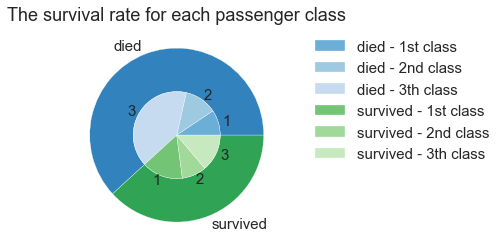

In [110]:
fig1, ax1 = plt.subplots()

outer_colors = cmap(np.array([0, 8]))
inner_colors = cmap(np.array([1, 2, 3, 9, 10, 11]))

ax1.pie(values.sum(axis=1), radius=1, colors=outer_colors,
       wedgeprops=dict(width=size, edgecolor='w'), labels=['survived' if l==1 else 'died' for l in outer_labels])

patches, _ = ax1.pie(values.flatten(), radius=0.5, colors=inner_colors, wedgeprops=dict(width=size, edgecolor='w'), labels=inner_labels)

ax1.set(aspect="equal", title='The survival rate for each passenger class')
plt.legend(patches, ['died - 1st class', 'died - 2nd class', 'died - 3th class', 'survived - 1st class', 'survived - 2nd class', 'survived - 3th class'], 
           loc='upper right', bbox_to_anchor=(2, 1))
plt.show()

In [111]:
result = dict()
for name, elements in df.groupby('survived'):
    temp = []
    for name1, elements1 in elements.groupby('pclass'):
        temp += [len(elements1)]
    result[name] = temp
result

{0: [123, 158, 528], 1: [200, 119, 181]}

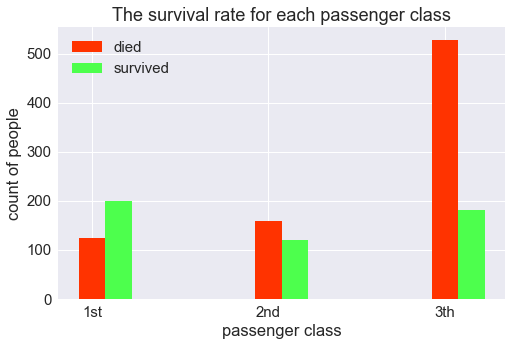

In [112]:
import seaborn as sns
sns.set(font_scale=1.5)

colors = ['#ff3300', '#4dff4d']

fig, axs = plt.subplots(1, 1, figsize=(8,5))
plt.xticks(np.arange(3), ['1st', '2nd', '3th'])
axs.set_title('The survival rate for each passenger class')
axs.set_ylabel('count of people') 
axs.set_xlabel('passenger class')

delta = 0.15
axs.bar(np.arange(3), result[0], width=delta, color=colors[0])
axs.bar(np.arange(3)+delta, result[1], width=delta, color=colors[1])

plt.legend(['died', 'survived'])
plt.show()

In [113]:
result = dict()
for name, elements in df.groupby('pclass'):    
    temp = []
    for name1, elements1 in elements.groupby('survived'):
        temp += [len(elements1)]
    result[name] = temp
result

{1: [123, 200], 2: [158, 119], 3: [528, 181]}

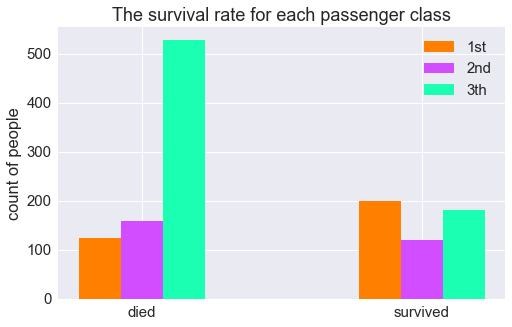

In [114]:
import seaborn as sns
sns.set(font_scale=1.5)

colors = ['#ff8000', '#d24dff', '#1affb2']

fig, axs = plt.subplots(1, 1, figsize=(8,5))
plt.xticks(np.arange(2), ['died', 'survived'])
axs.set_title('The survival rate for each passenger class')
axs.set_ylabel('count of people') 
axs.set_xlabel('')

delta = 0.15
axs.bar(np.arange(2)-delta, result[1], width=delta, color=colors[0])
axs.bar(np.arange(2), result[2], width=delta, color=colors[1])
axs.bar(np.arange(2)+delta, result[3], width=delta, color=colors[2])

plt.legend(['1st', '2nd', '3th'])
plt.show()

# Task4

Plot the survival rate based on the point of embarkment.

In [115]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [116]:
df['embarked'].unique()
# C = Cherbourg, Q = Queenstown, S = Southampton

array(['S', 'C', nan, 'Q'], dtype=object)

In [117]:
df['embarked'].isna().sum()

2

In [118]:
df[df['embarked'].isnull()]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
168,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,6,NaN,NaN
284,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,6,NaN,"Cincinatti, OH"


In [119]:
result = dict()
for name, elements in df.groupby('survived'):
    print(name, ':', len(elements))
    temp = []
    for name1, elements1 in elements.groupby('embarked'):
        print('\t', name1, ':', len(elements1))
        temp += [len(elements1)]   
    result[name] = temp
result

0 : 809
	 C : 120
	 Q : 79
	 S : 610
1 : 500
	 C : 150
	 Q : 44
	 S : 304


{0: [120, 79, 610], 1: [150, 44, 304]}

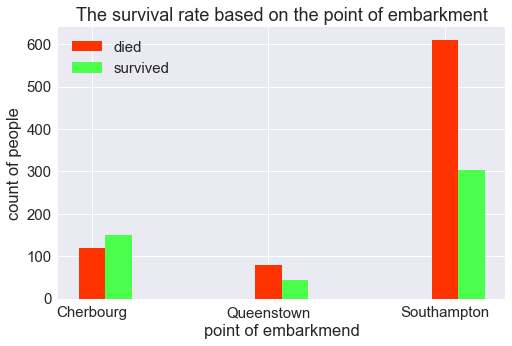

In [120]:
import seaborn as sns
sns.set(font_scale=1.5)

colors = ['#ff3300', '#4dff4d']

fig, axs = plt.subplots(1, 1, figsize=(8,5))
plt.xticks(np.arange(3), ['Cherbourg', 'Queenstown', 'Southampton'])
axs.set_title('The survival rate based on the point of embarkment')
axs.set_ylabel('count of people') 
axs.set_xlabel('point of embarkmend')

delta = 0.15
axs.bar(np.arange(3), result[0], width=delta, color=colors[0])
axs.bar(np.arange(3)+delta, result[1], width=delta, color=colors[1])

plt.legend(['died', 'survived'])
plt.show()

# Task 5

For all those who survived, plot a trend of the price of the ticket they paid.

In [121]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [122]:
import operator

df_survived = df[df['survived']==1]
fare_frequency = df_survived['fare'].value_counts()
fare_frequency_sorted = sorted(fare_frequency.items(), key=operator.itemgetter(0))

prices = [price_freq[0] for price_freq in fare_frequency_sorted]
freqs = [price_freq[1] for price_freq in fare_frequency_sorted]

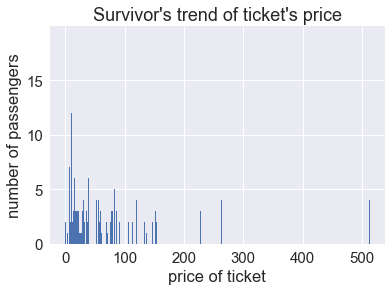

In [123]:
plt.bar(prices,freqs)

plt.xlabel('price of ticket')
plt.ylabel('number of passengers')
plt.title("Survivor's trend of ticket's price")
plt.show()

# Task 6

Calculate the conditional probability that a person survives given their sex and
passenger-class.

Conditional probability: 
\begin{equation*}
 P(A|B) = \frac{P(A \cap B)}{P(B)}
\end{equation*}


Our scenario:
\begin{equation*}
P(Survival | Sex = X \cap Class = Y) = \frac{P (Survive \cap Sex=X \cap Class=Y) }{P (Sex=X \cap Class=Y)}
\end{equation*}

In [124]:
def calculate_conditional_probability(survived, sex, pclass):
    p_sex_pclass = len(df[(df['sex']==sex) & (df['pclass']==pclass)]) / len(df)
    p_sex_pclass_survival = len(df[(df['sex']==sex) & (df['pclass']==pclass) & (df['survived']==survived)])/len(df)
    return p_sex_pclass_survival / p_sex_pclass

In [125]:
def get_sex(sex):
    if sex == 'female':
        return 'women' 
    elif sex == 'male':
        return 'men'
    else: 
        return 'not known'

In [126]:
for sex in ['female', 'male']:
    for pClass in range(1, 4): 
        print ("Survival probability for " + get_sex(sex) + " from " + str(pClass) + " class: " 
               + str(np.round(calculate_conditional_probability(1, sex, pClass), 2)) + "%")

Survival probability for women from 1 class: 0.97%
Survival probability for women from 2 class: 0.89%
Survival probability for women from 3 class: 0.49%
Survival probability for men from 1 class: 0.34%
Survival probability for men from 2 class: 0.15%
Survival probability for men from 3 class: 0.15%
